# Building Linear Regression Model <br>
### Question : How does study hours affect exam score? <br>
### Purpose : To know the relationship of study hours and exam score.
### How we find the answer for question : Use Linear Regression model to output the answer of how study hours affect exam score

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# import data
edu = pd.read_csv("study_hours_vs_exam_score.csv")

In [ ]:
# check data
edu

,Study_Hours,Exam_Score
0,0.749080,3.865304
1,1.901429,7.705496
2,1.463988,6.369838
3,1.197317,4.396825
4,0.312037,2.182295
...,...,...
95,0.987591,4.248664
96,1.045466,4.820579
97,0.855082,4.363363
98,0.050838,1.516279


## Linear Regression : Draw the line through the points of data which give the least residuals. <br>
### MSE : Mean Squared Error -> (1/n) * sum of (y - y_hat)**2 <br>
n = Number of observations <br>
y = Actual value of y <br>
y_hat = Fitted value of y <br><br>
## From Linear Regression's concept, we want to minimize the residuals. <br>
## So, we use calculas to find the gredient descent (loss function). <br>
### residuals = y - y_hat
y_hat = b0 + b1 * x
### residuals = y - (b0 + b1 * x)
b0 = constant 
b1 = coefficient of x
x = independent variable (study hours)
### MSE = (1/n) * sum of (y - (b0 + b1 * x))**2
### dMSE/db0 = -(2/n) * sum of (y - b0 - b1 * x) * (1) --> gradient of b0
### dMSE/db1 = -(2/n) * sum of (y - b0 - b1 * x) * (x) --> gradient of b1 <br><br>
## Then, we use these gradient multiplying with learning level to make the machine learn the mistake from the model.
### b0 = b0 - gradient of b0 * learning rate -> b0 minus the error from 1 unit increasing b0 because we want to remove the error until it's the least value.
### b1 = b1 - gradient of b1 * learning rate -> b1 minus the error from 1 unit increasing b1 because we want to remove the error until it's the least value.
## Then, we will get b0 and b1

In [ ]:
# define the loss fucntion
def gradient_descent(b0,b1,points,learning_level):
    b0_gradient = 0
    b1_gradient = 0
    n = len(points)
    # For loop for accumulating the gradient (sum of -(2/n) * (y - b0 - b1 * x) *)
    for i in range(len(points)):
        x = points.iloc[i,0]
        y = points.iloc[i,1]
        b0_gradient += -(2/n) * (y - b0 - b1 * x)
        b1_gradient += -(2/n) * (y - b0 - b1 * x) * x
    b0 = b0 - b0_gradient * learning_level
    b1 = b1 - b1_gradient * learning_level
    return b0,b1

# define the function for inputting the data , learning rate, and number of iterative process
def simreg(dataset,learning_level,epochs):  
    b0 = 0
    b1 = 0
    L = learning_level
    for x in range(epochs):
       b0,b1 = gradient_descent(b0,b1,dataset,L)

    print(f"intercept is {b0}")
    print(f"slope is {b1}")

# plot the scotter plot and draw fitted line
    plt.scatter(dataset.iloc[:,0],dataset.iloc[:,1])
    plt.plot(np.linspace(dataset.iloc[:,0].min(),dataset.iloc[:,0].max(),100),b0 + b1 * np.linspace(dataset.iloc[:,0].min(),dataset.iloc[:,0].max(),100),color = "red")
    plt.xlabel("Study Time")
    plt.ylabel("Exam Score")
    plt.title('Relationship between "Study Time" & "Exam Score"')
    print(f"Linear Equation : SCORE = {b0} + {b1} x STUDY_TIME" )

intercept is 1.3390771469466247
slope is 3.3572182397795545
Linear Equation : SCORE = 1.3390771469466247 + 3.3572182397795545 x STUDY_TIME


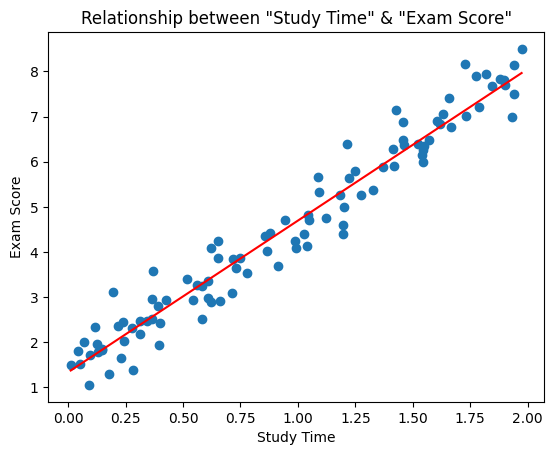

In [30]:
simreg(edu,0.01,1000)

## Interpretation : If study time increase 1 hour, exam score will approximately increase 3.3572 point 